In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [49]:
# Carregar os dados relevantes para análise
# Dados dos alunos
tbAluno = pd.read_csv('database/tbAluno.csv')
tbHistorico = pd.read_csv('database/tbHistorico.csv')

# Dados de frequência
tbDiarioFrequencia = pd.read_csv('database/TbDiarioFrequencia.csv')

# Dados de notas e desempenho
tbFase = pd.read_csv('database/tbFase.csv')

In [50]:
# Limpeza da tabela de alunos
tbAluno['IdTipoOcorrencia'].fillna(tbAluno['IdTipoOcorrencia'].mode()[0], inplace=True)
tbAluno['IdTurma'].fillna(tbAluno['IdTurma'].mode()[0], inplace=True)

# Remover registros com notas negativas ou nulas
tbFase = tbFase[(tbFase['NotaFase'] >= 0) & (tbFase['NotaFase'].notnull())]

# Limpeza da tabela de frequência 
tbDiarioFrequencia = tbDiarioFrequencia[tbDiarioFrequencia['StPresencaFalta'].notnull()]

/var/folders/tn/ynwydwgx6fzgshyrwp_975q00000gn/T/ipykernel_24347/767550454.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tbAluno['IdTipoOcorrencia'].fillna(tbAluno['IdTipoOcorrencia'].mode()[0], inplace=True)
/var/folders/tn/ynwydwgx6fzgshyrwp_975q00000gn/T/ipykernel_24347/767550454.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate objec

In [51]:
# Vamos começar com algumas análises descritivas
# Análise descritiva do dataset de alunos
aluno_descriptive = tbAluno.describe(include='all')

# Análise descritiva do histórico acadêmico dos alunos
historico_descriptive = tbHistorico.describe(include='all')

# Análise de frequência
frequencia_counts = tbDiarioFrequencia['StPresencaFalta'].value_counts()

# Análise de notas
notas_distribution = tbFase['NotaFase'].describe()

# Exibir os resultados das análises iniciais
aluno_descriptive, historico_descriptive

(        IdAlunoRotinaEducacaoInfantil       IdAluno     IdTurma_x  \
 count                    49089.000000  49089.000000  49089.000000   
 unique                            NaN           NaN           NaN   
 top                               NaN           NaN           NaN   
 freq                              NaN           NaN           NaN   
 mean                     64766.091833    855.121860    305.032512   
 std                      38270.366572    178.101829     89.656826   
 min                       3923.000000    727.000000    231.000000   
 25%                      21034.000000    727.000000    231.000000   
 50%                      74733.000000    773.000000    273.000000   
 75%                      98479.000000   1147.000000    453.000000   
 max                     118065.000000   1310.000000    505.000000   
 
                        Data  IdProfessorResponsavel  IdUsuarioResponsavel  \
 count                 49089            49089.000000                   0.0   
 u

In [52]:
frequencia_counts

StPresencaFalta
P    246374
F     61650
J      5136
Name: count, dtype: int64

In [53]:
notas_distribution

count    1151.000000
mean        3.685143
std         2.571512
min         0.000000
25%         1.000000
50%         4.000000
75%         6.000000
max        10.000000
Name: NotaFase, dtype: float64

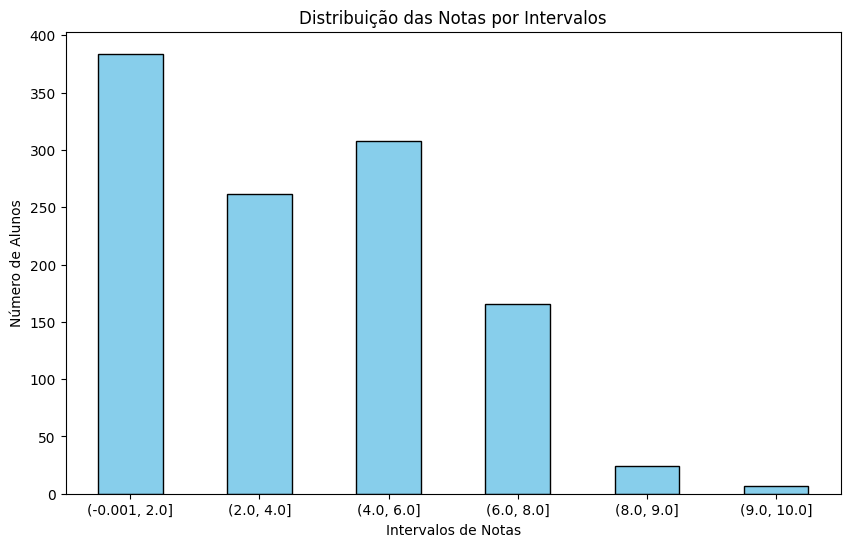

In [54]:
# Agrupar as notas em intervalos
intervalos = pd.cut(tbFase['NotaFase'], bins=[0, 2, 4, 6, 8, 9, 10], include_lowest=True)

# Contar a frequência de cada intervalo
distribuicao_notas = intervalos.value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
distribuicao_notas.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição das Notas por Intervalos')
plt.xlabel('Intervalos de Notas')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=0)  # Manter os rótulos do eixo X na horizontal
plt.show()

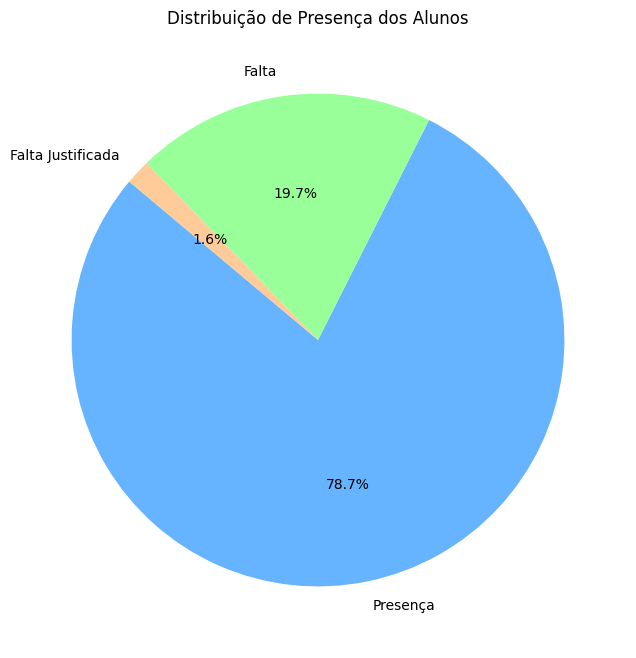

In [56]:
# Mapeamento para rótulos personalizados
label_map = {'P': 'Presença', 'F': 'Falta', 'J': 'Falta Justificada'}
frequencia_counts.index = frequencia_counts.index.map(label_map)

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(frequencia_counts, labels=frequencia_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'], startangle=140)
plt.title('Distribuição de Presença dos Alunos')
plt.show()

Correlação entre frequência e notas: 0.22


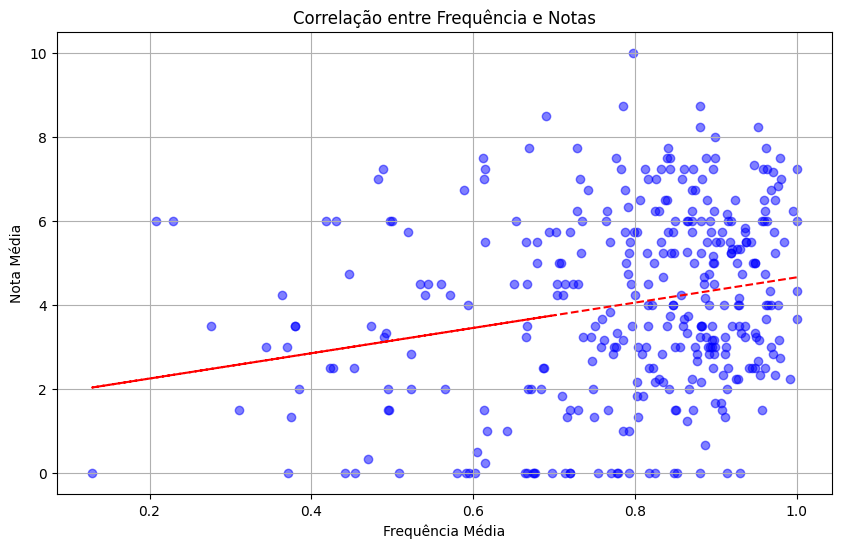

In [58]:
# Mapeamento da presença para numérico (1 para presente, 0 para falta, 0.5 para falta justificada)
presenca_map = {'P': 1, 'F': 0, 'J': 0.5}
tbDiarioFrequencia['PresencaNumerica'] = tbDiarioFrequencia['StPresencaFalta'].map(presenca_map)

# Calcular a frequência média por aluno
frequencia_media = tbDiarioFrequencia.groupby('IdAluno')['PresencaNumerica'].mean().reset_index()

# Calcular a nota média por aluno
nota_media = tbFase.groupby('IdAluno')['NotaFase'].mean().reset_index()

# Unir as tabelas de frequência média e nota média
df_correlation = pd.merge(frequencia_media, nota_media, on='IdAluno')

# Calcular a correlação entre frequência e notas
correlation, _ = pearsonr(df_correlation['PresencaNumerica'], df_correlation['NotaFase'])
print(f"Correlação entre frequência e notas: {correlation:.2f}")

# Visualizar a correlação com um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df_correlation['PresencaNumerica'], df_correlation['NotaFase'], color='blue', alpha=0.5)
plt.title('Correlação entre Frequência e Notas')
plt.xlabel('Frequência Média')
plt.ylabel('Nota Média')
plt.grid(True)

# Adicionar uma linha de tendência
z = np.polyfit(df_correlation['PresencaNumerica'], df_correlation['NotaFase'], 1)
p = np.poly1d(z)
plt.plot(df_correlation['PresencaNumerica'], p(df_correlation['PresencaNumerica']), "r--")

plt.show()